In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

### Different sims, smae HOD, same HOD's seed:

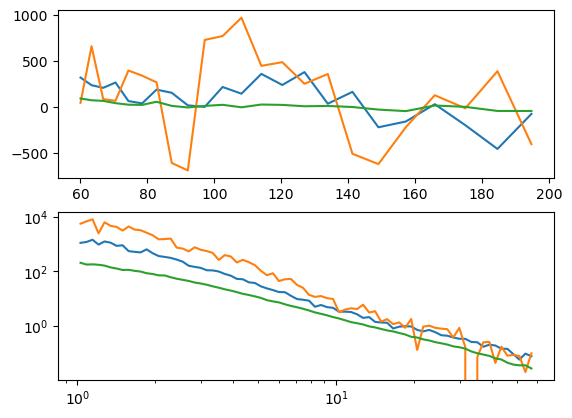

In [14]:
with h5py.File('/home/qezlou/HD2/HETDEX/cosmo/data/corrs/corr_gal_zspace_z2.5.hdf5','r') as f:
    r = f['r'][:]
    corr = f['corr'][:]

fig, ax = plt.subplots(2,1)

ind = r > 60
for i in range(corr.shape[0]):
    ax[0].plot(r[ind], r[ind]**2 * corr[i][ind])
ind = r <= 60
for i in range(corr.shape[0]):
    ax[1].plot(r[ind], corr[i][ind])
ax[1].set_yscale('log')
ax[1].set_xscale('log')

### Same sim, same HOD, but changing HOD's seed:

In [47]:
import math

def plot_corr_fixed_hod(corr_files, title, small_scale=True):
    num_files = len(corr_files)
    m = math.ceil(math.sqrt(num_files))
    n = math.ceil(num_files / m)
    
    fig, axs = plt.subplots(m, n, figsize=(5*n, 5*m))
    if type(axs)!=np.ndarray:
        axs = np.array([axs])
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    for c, svf in enumerate(corr_files):
        with h5py.File(svf, 'r') as f:
            r = f['r'][:]
            corr = f['corr'][:]
        if small_scale:
            ind = r <= 60
            for i in range(corr.shape[0]):
                axs[c].plot(r[ind], corr[i][ind])

            axs[c].set_ylabel(r'$ \xi_0$')
            axs[c].set_xlabel(r'r [cMpc/h] ')
            axs[c].set_yscale('log')
            axs[c].set_xscale('log')
            axs[c].set_title(f'{title} | Cosmo {c}')
        else:
            ind = r > 60
            for i in range(corr.shape[0]):
                axs[c].plot(r[ind], r[ind]**2 * corr[i][ind])
            axs[c].set_ylabel(r'$r^2 \times \xi_0$')
            axs[c].set_xlabel(r'r [cMpc/h] ')
            axs[c].set_title(f'{title} | Cosmo {c}')

    fig.tight_layout()
    plt.show()

In [55]:
from glob import glob
from os import path as op
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/'
core_files = ['Zheng07_seeds.hdf5', 
              'Zheng07_seedscosmo_10p_Box1000_Part750_0020.hdf5', 
              'Zheng07_seeds_cosmo_10p_Box1000_Part750_0040.hdf5',
              'Zheng07_seeds_cosmo_10p_Box1000_Part750_0000.hdf5',
              'Zheng07_seeds_cosmo_10p_Box1000_Part750_0001.hdf5',
              'Zheng07_seeds_cosmo_10p_Box1000_Part750_0002.hdf5',
              'Zheng07_seeds_cosmo_10p_Box1000_Part750_0003.hdf5',
              'Zheng07_seeds_cosmo_10p_Box1000_Part3000_0024.hdf5',
              'Zheng07_seeds_cosmo_10p_Box250_Part750_0000.hdf5']

l1_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box1000_Part750_*' ))
l2_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box250_Part750_*' ))
hf_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box1000_Part3000_*' ))
print(f'l1 = {len(l1_corrs)}, l2 = {len(l2_corrs)}, hf = {len(hf_corrs)}')

l1 = 10, l2 = 17, hf = 3


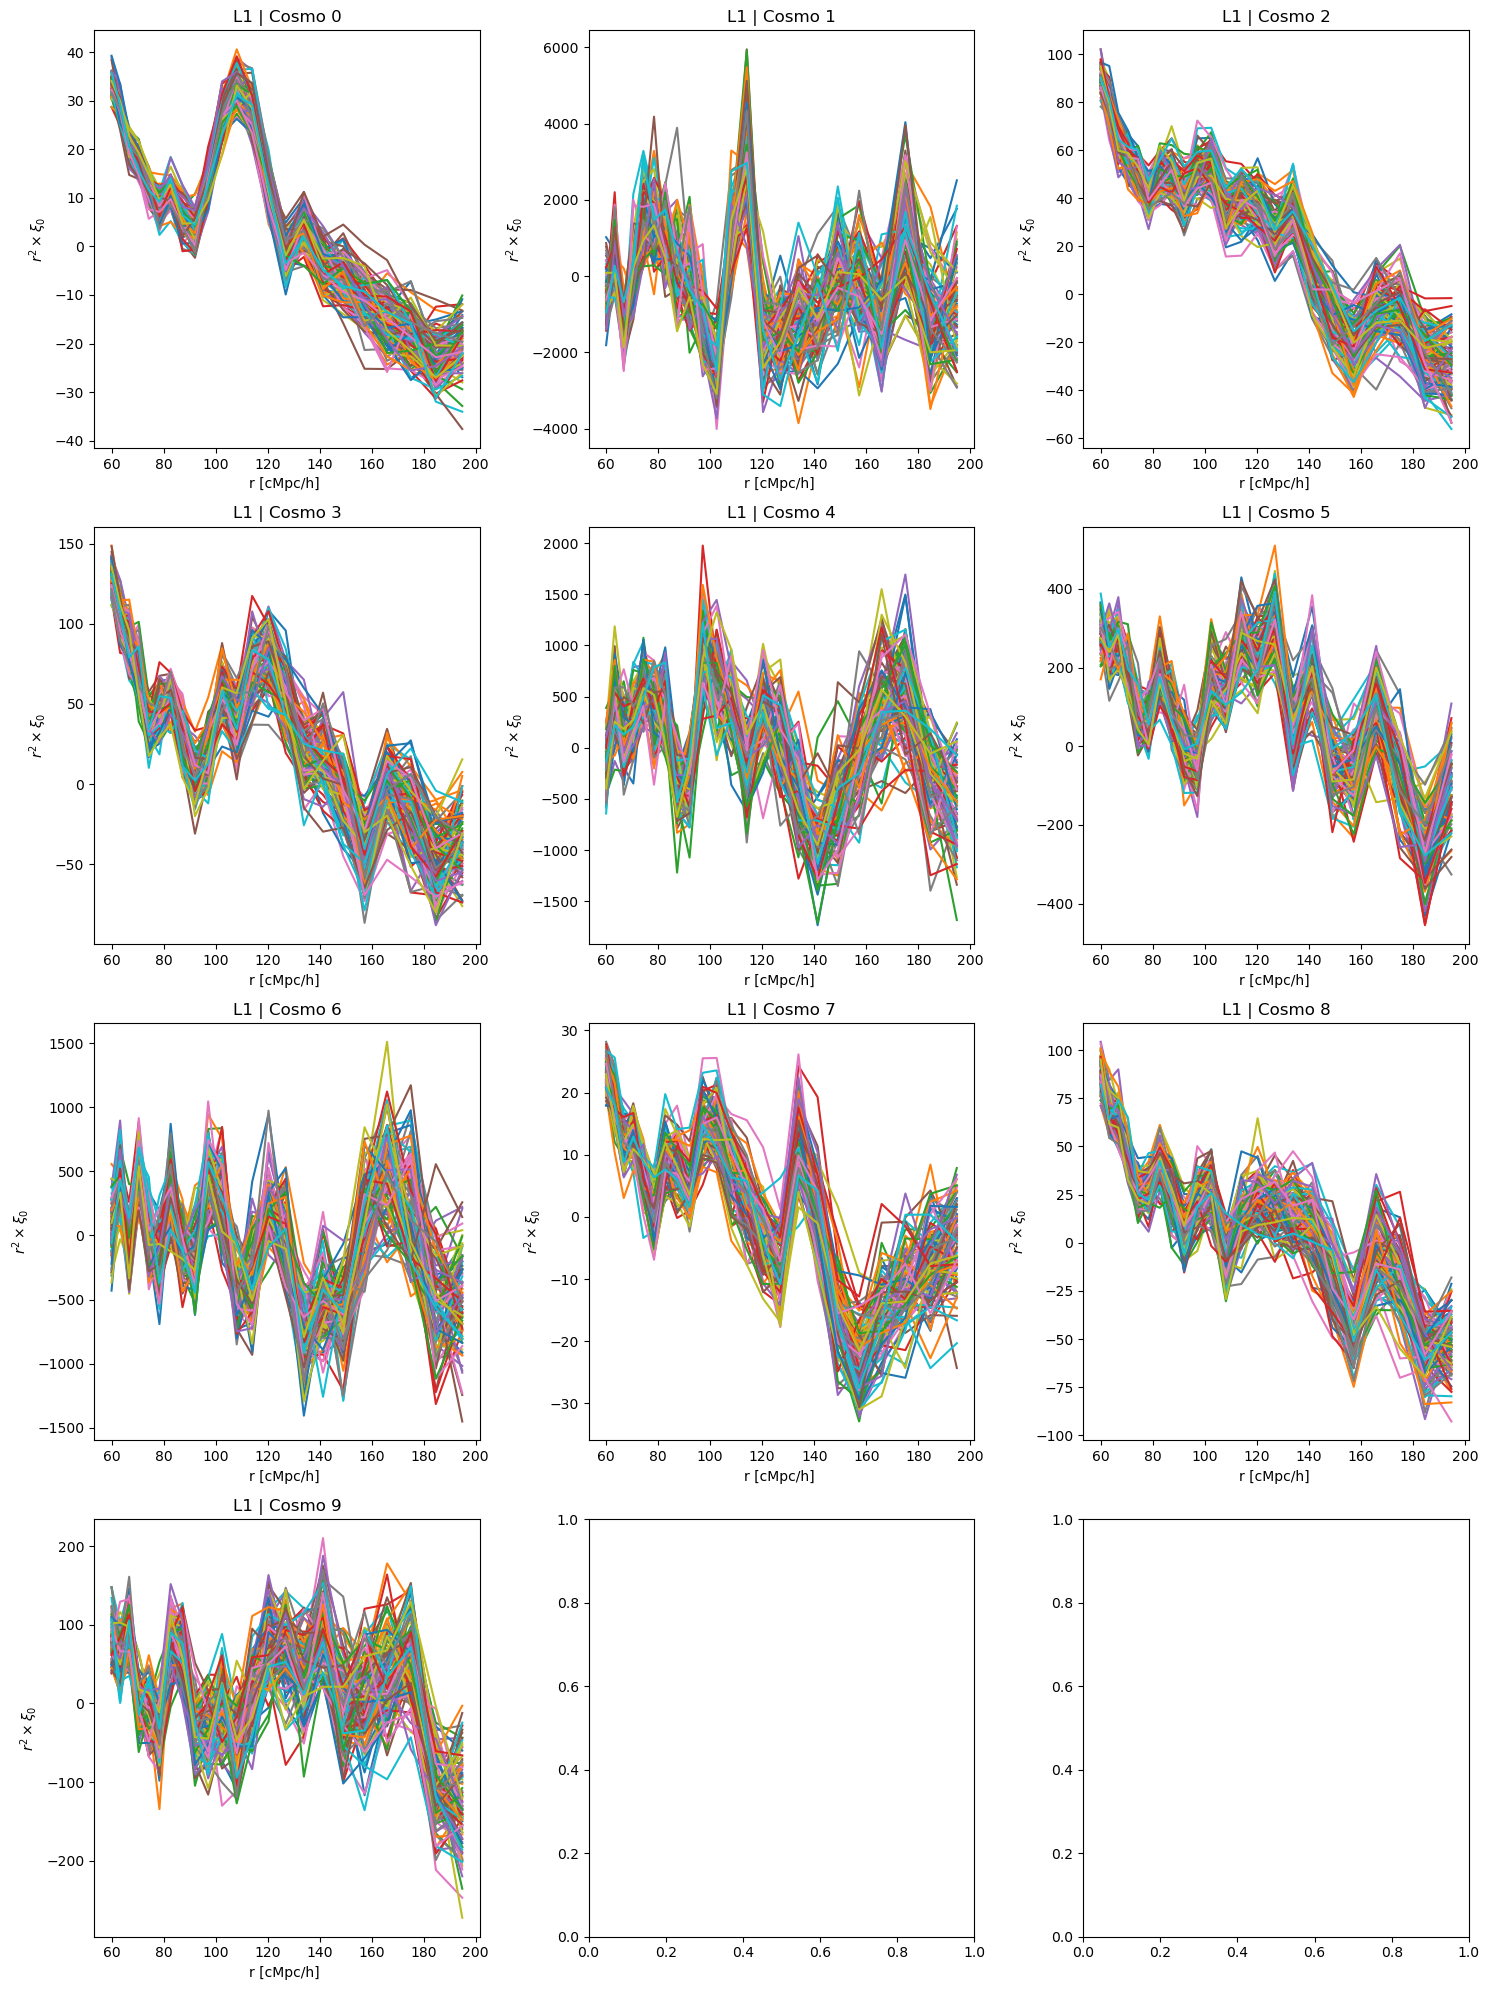

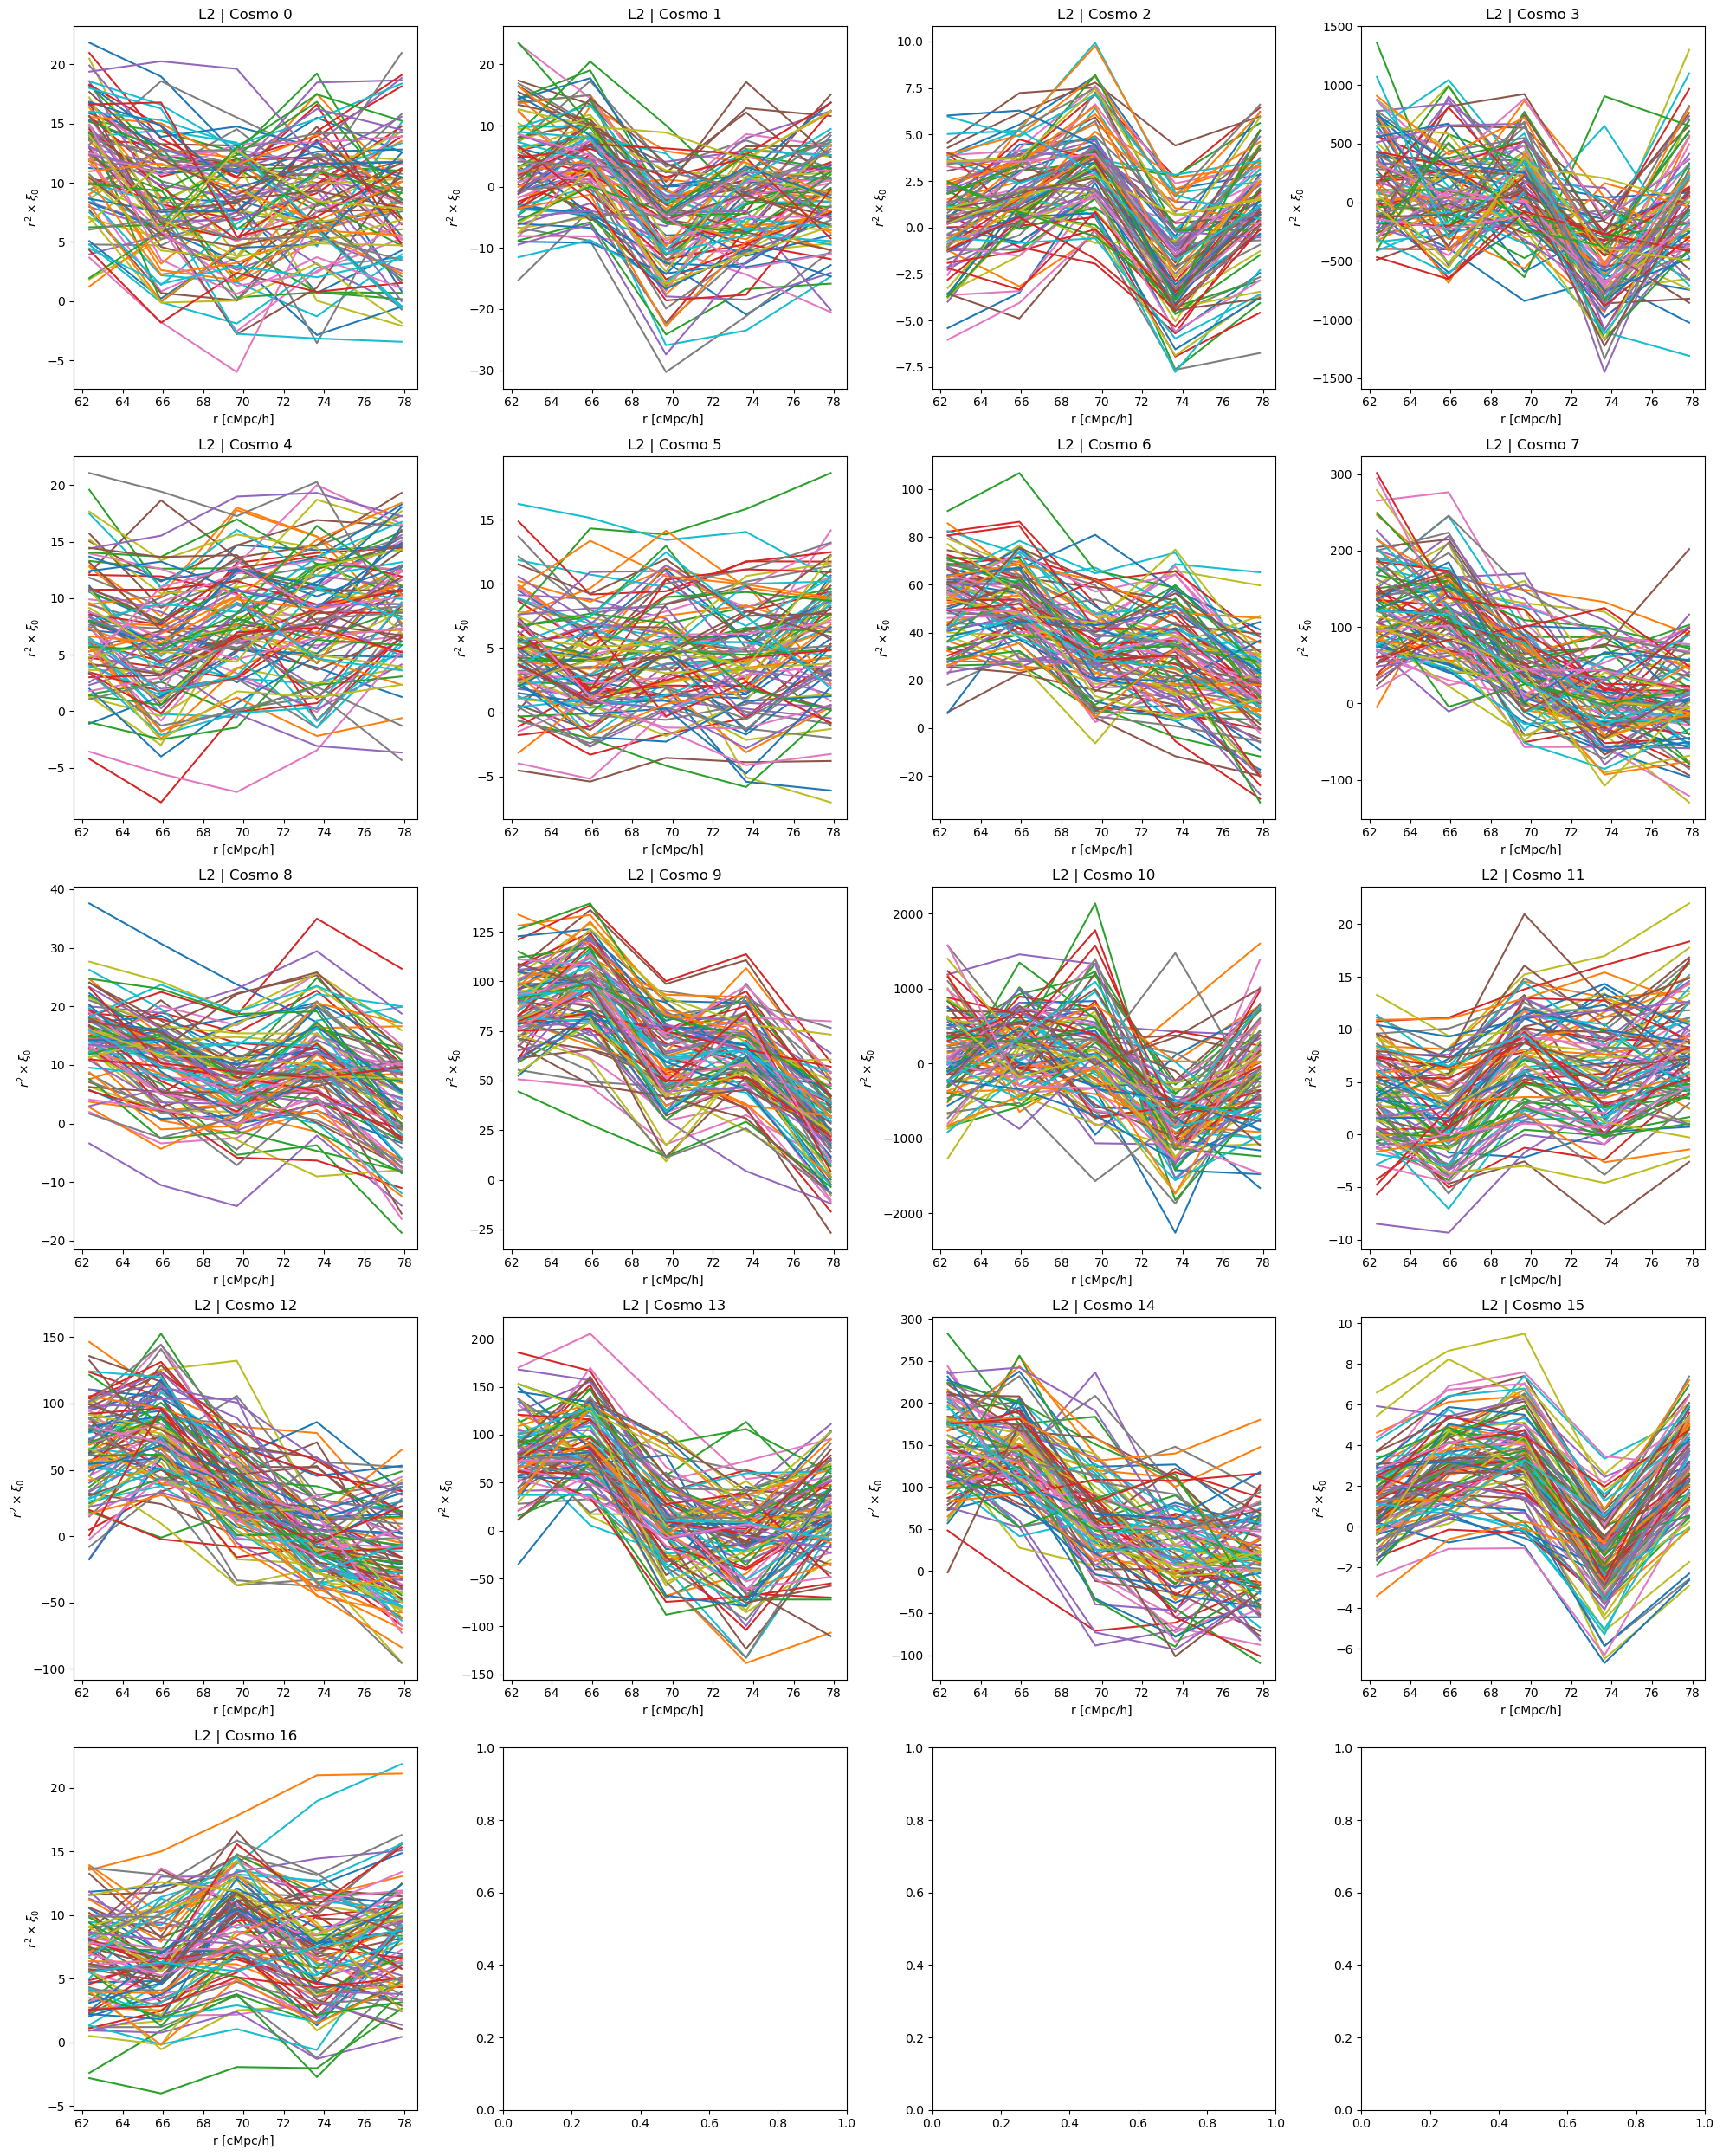

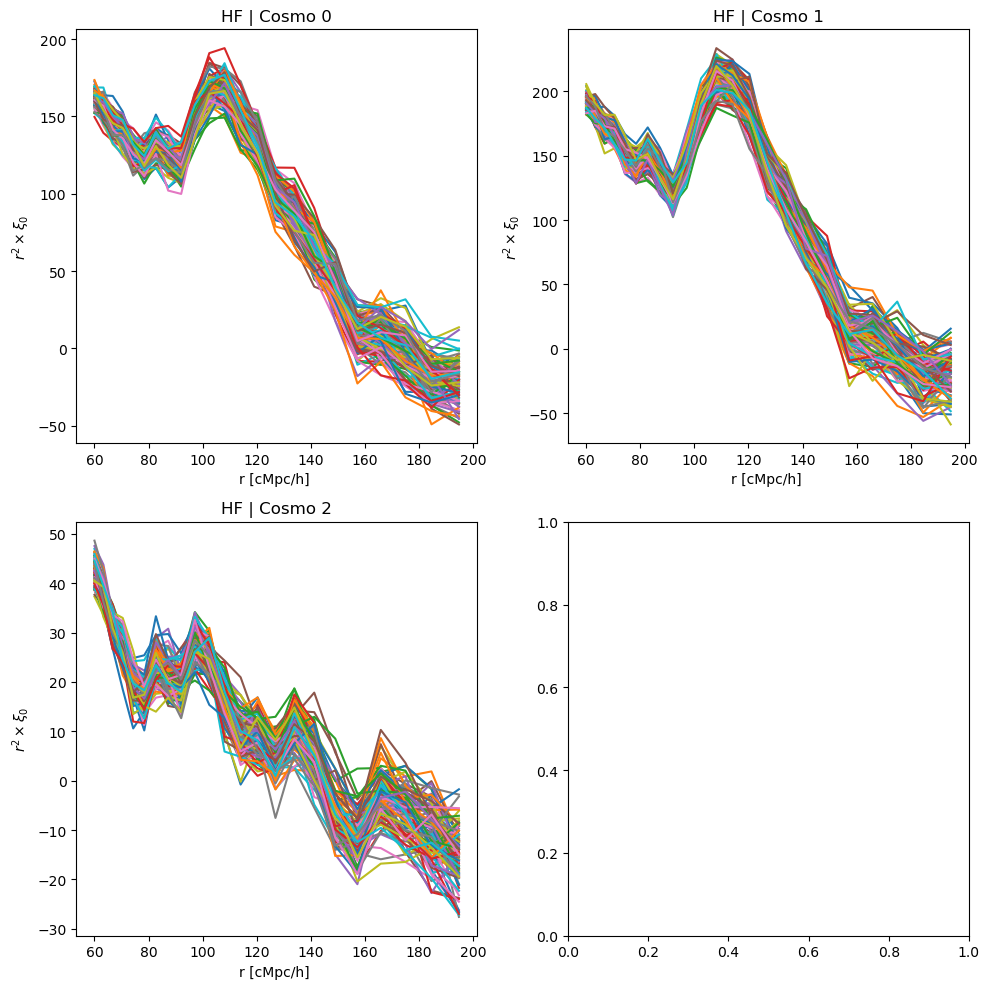

In [56]:
plot_corr_fixed_hod(l1_corrs, 'L1', small_scale=False)
plot_corr_fixed_hod(l2_corrs, 'L2', small_scale=False)
plot_corr_fixed_hod(hf_corrs, 'HF', small_scale=False)

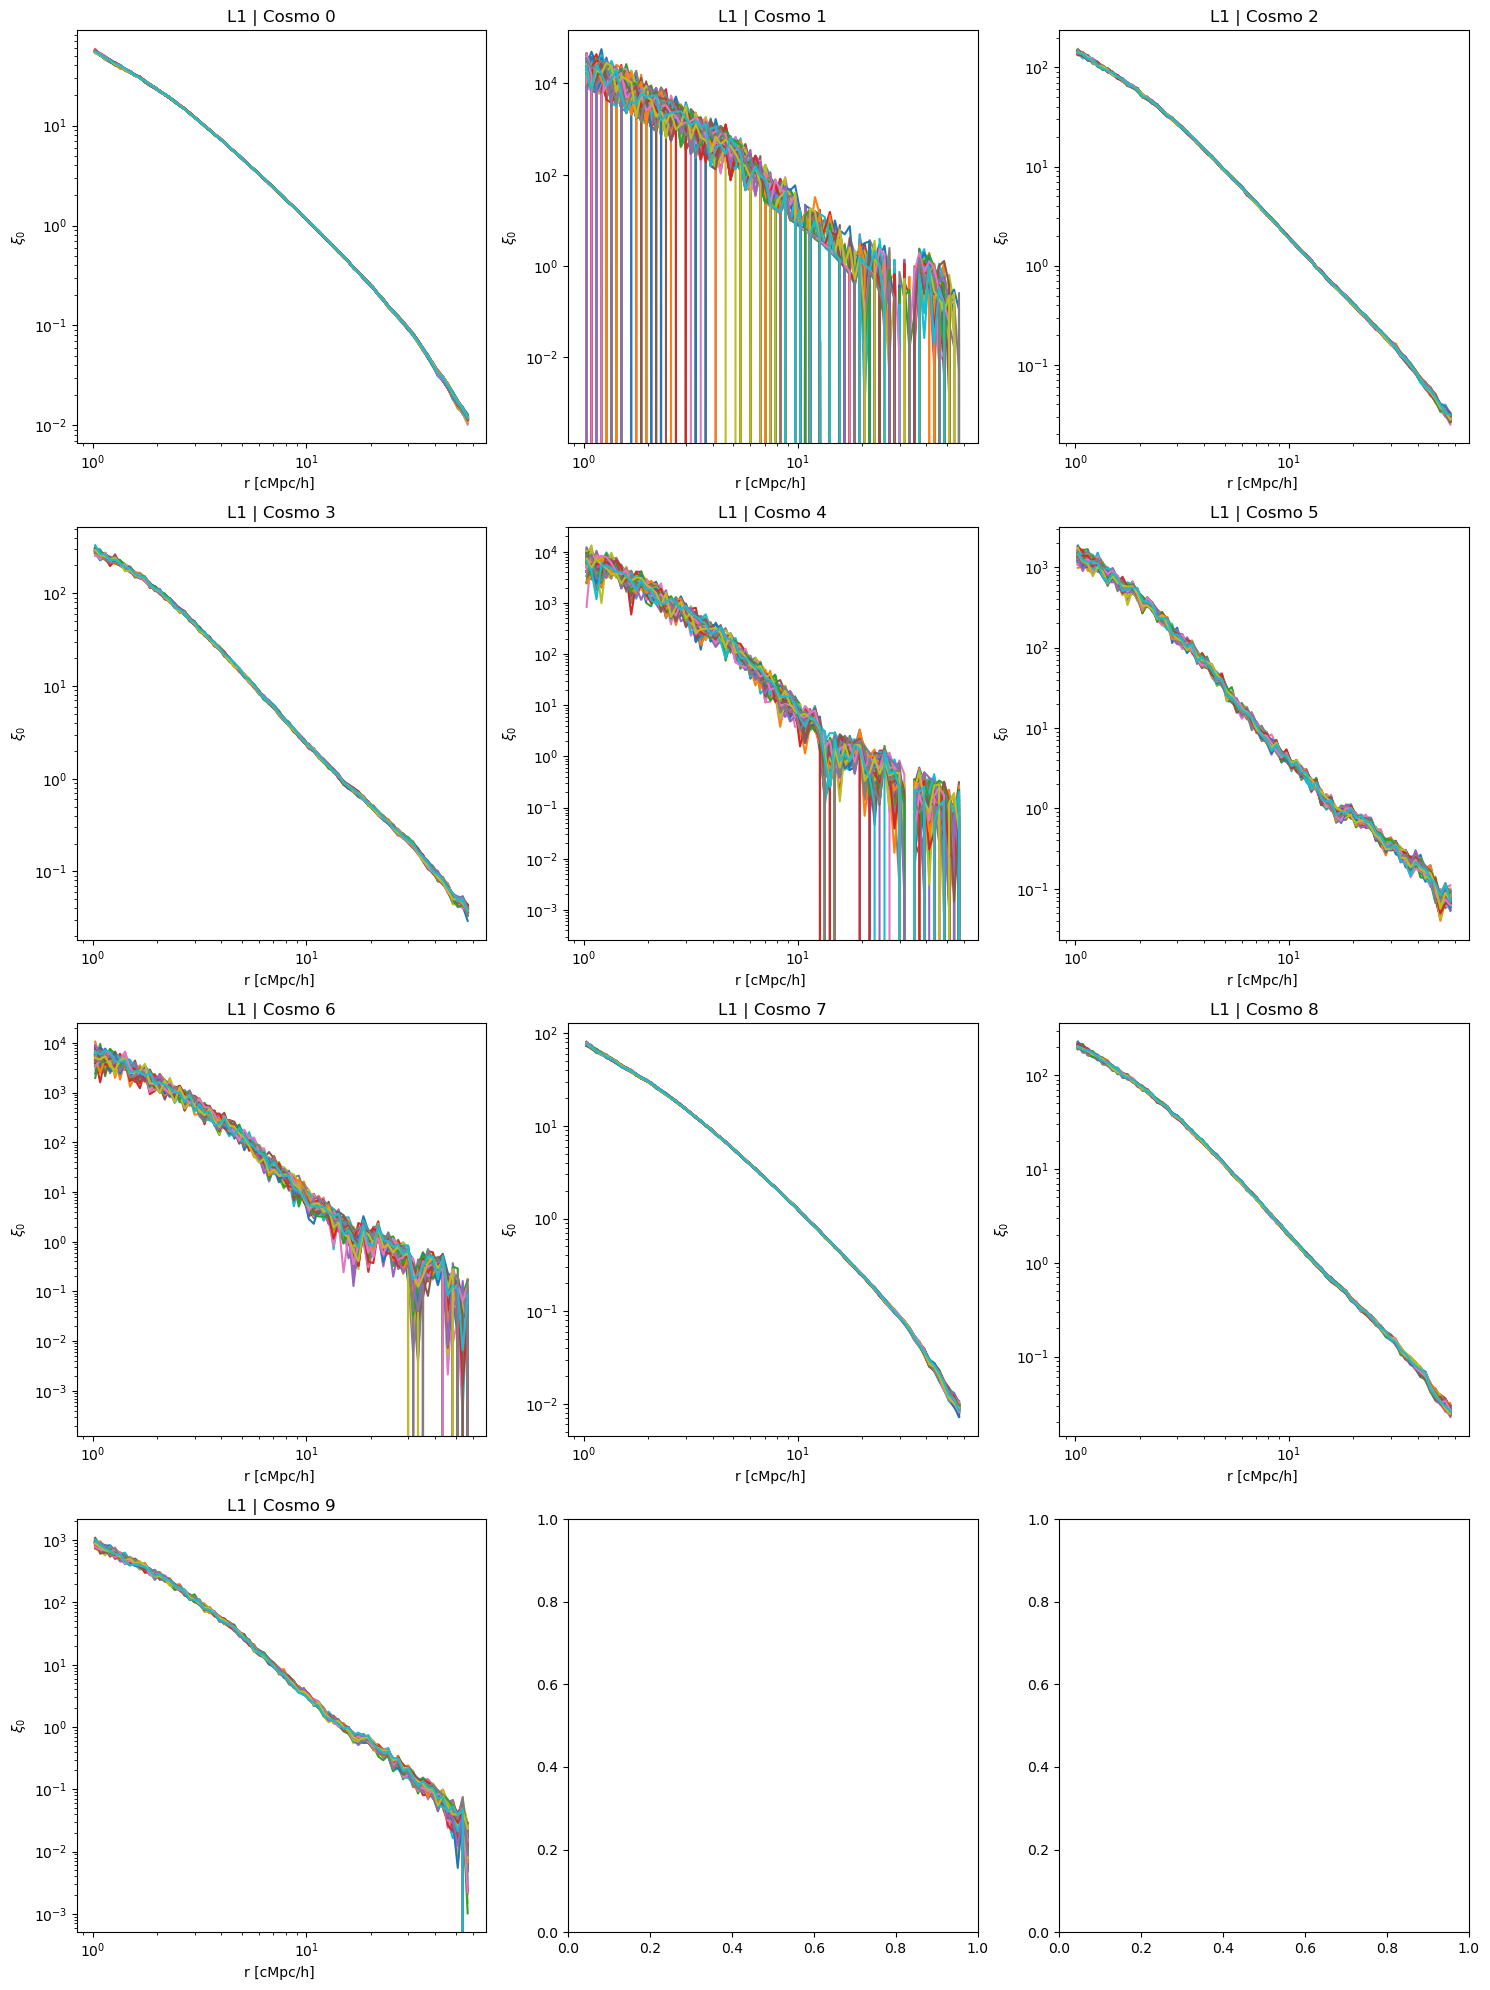

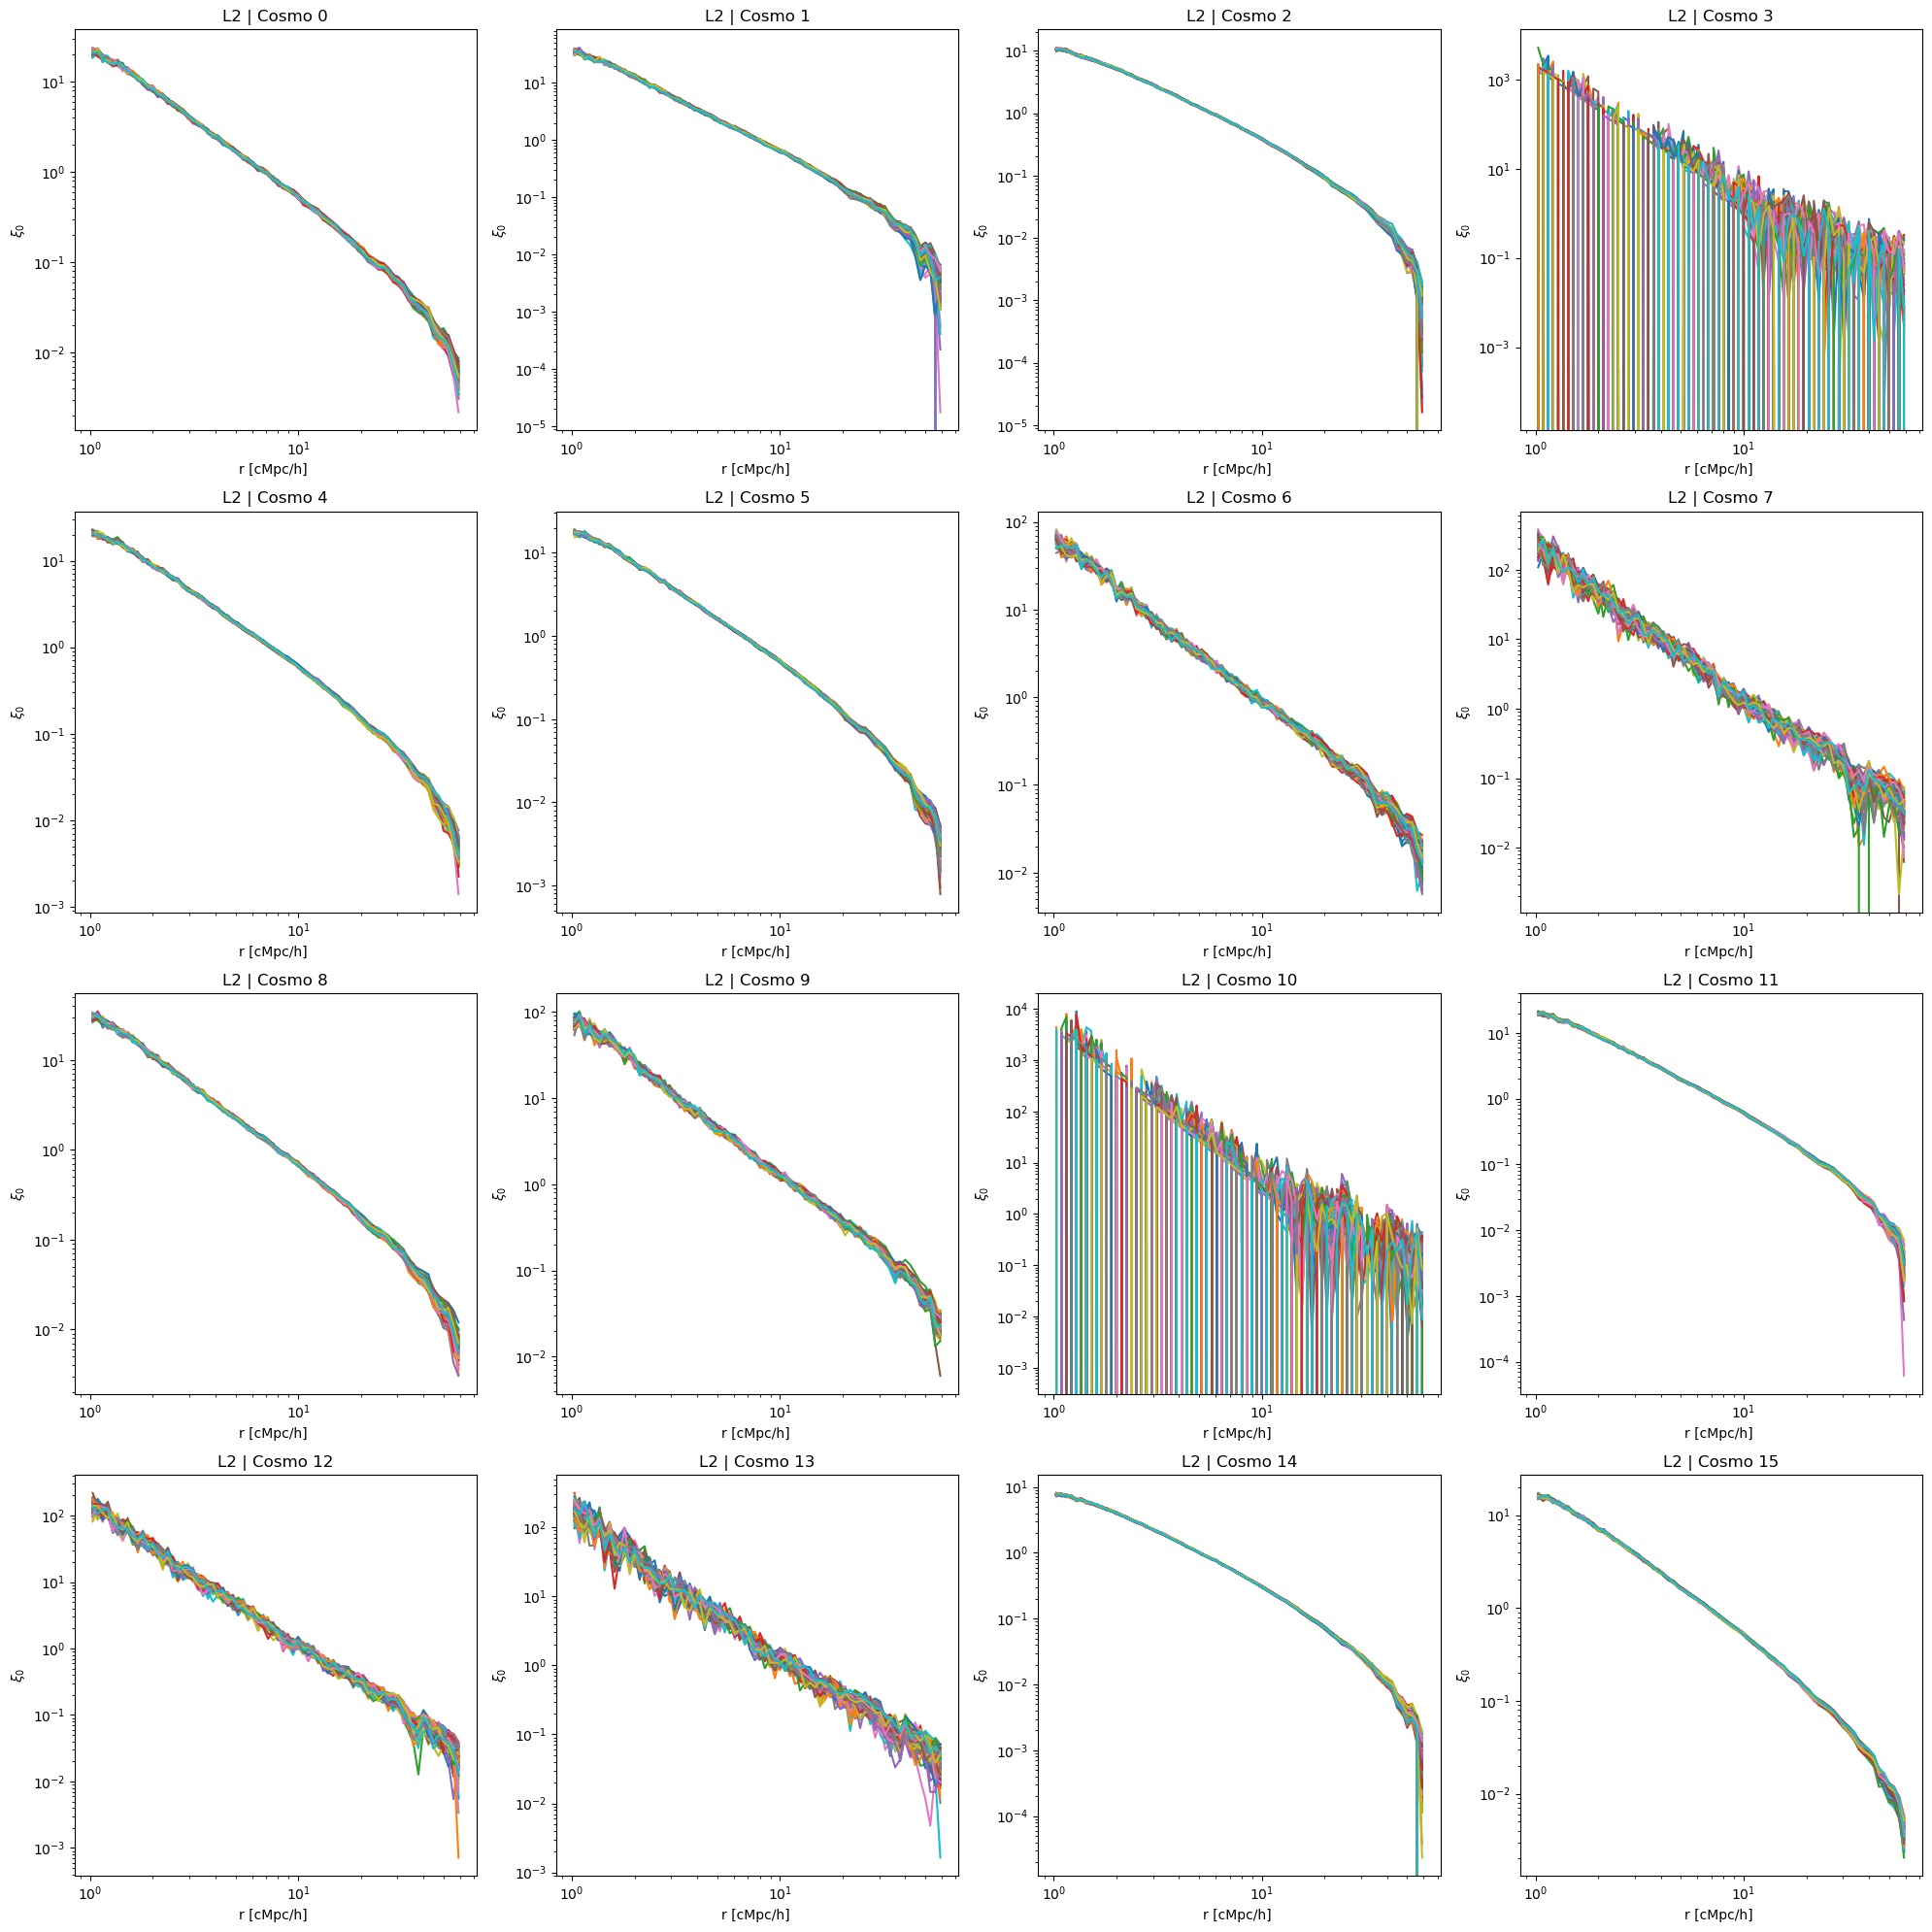

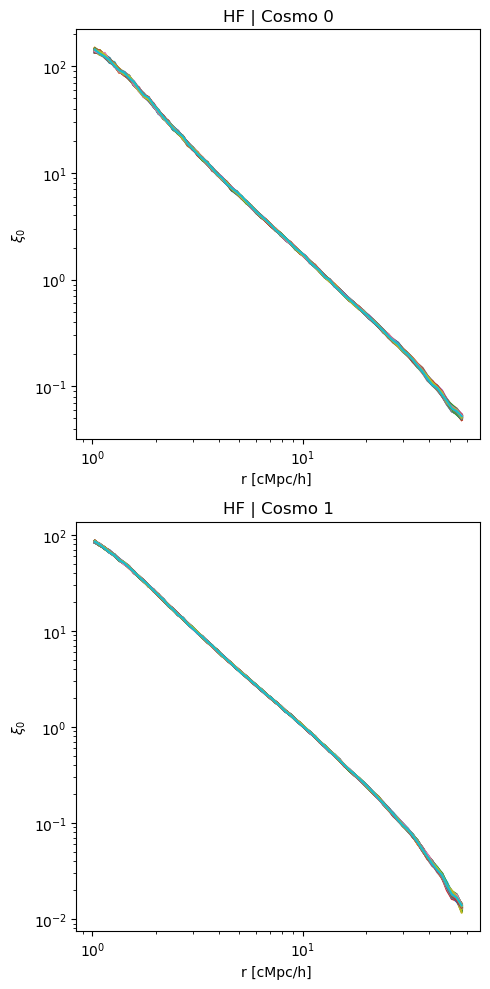

In [54]:
plot_corr_fixed_hod(l1_corrs, 'L1', small_scale=True)
plot_corr_fixed_hod(l2_corrs, 'L2', small_scale=True)
plot_corr_fixed_hod(hf_corrs, 'HF', small_scale=True)